In [1]:
%pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.1.2+cu121
Uninstalling torch-2.1.2+cu121:
  Successfully uninstalled torch-2.1.2+cu121
Found existing installation: torchvision 0.16.2+cu121
Uninstalling torchvision-0.16.2+cu121:
  Successfully uninstalled torchvision-0.16.2+cu121
Found existing installation: torchaudio 2.1.2+cu121
Uninstalling torchaudio-2.1.2+cu121:
  Successfully uninstalled torchaudio-2.1.2+cu121
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install -q datasets seqeval evaluate bitsandbytes peft numpy pandas huggingface_hub transformers keras


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q gdown openpyxl datasets tf-keras nltk 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install evaluate seqeval

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")

if cuda_available:
    # Get the CUDA version
    cuda_version = torch.version.cuda
    print(f"CUDA Version: {cuda_version}")

    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU Name: {gpu_name}")

    # Get the number of CUDA devices
    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA Devices: {num_devices}")

CUDA Available: True
CUDA Version: 12.4
GPU Name: NVIDIA A100-SXM4-40GB MIG 7g.40gb
Number of CUDA Devices: 1


In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('../Datasets/train-35.csv')
train_df['token'] = train_df['token'].astype(str)

test_df = pd.read_csv('../Datasets/test.csv')
test_df['token'] = test_df['token'].astype(str)

In [5]:
train_df.dropna(axis=0, inplace=True)

In [6]:
train_df

,text_id,id,token,pos_tag,entity,argument
0,BAN-00001,BAN-00001.001,13,NUM,O,O
1,BAN-00001,BAN-00001.002,janji,VB,O,O
2,BAN-00001,BAN-00001.003,akan,ADV,O,O
3,BAN-00001,BAN-00001.004,mencari,VB,O,O
4,BAN-00001,BAN-00001.005,solusi,NN,O,O
...,...,...,...,...,...,...
76293,KEC-01500,KEC-01500.017,kecelakaan-kecelakaan,NN,B-EVE,FALSE-EVENT
76294,KEC-01500,KEC-01500.018,di,IN,O,O
76295,KEC-01500,KEC-01500.019,ambang,NN,O,O
76296,KEC-01500,KEC-01500.020,berlakunya,VB,O,O


In [7]:
train_df = train_df.groupby('text_id').agg({
    'token': list,
    'pos_tag': list,
    'entity': list,
    'argument': list
}).reset_index()

test_df = test_df.groupby('text_id').agg({
    'token': list,
    'pos_tag': list,
    'entity': list,
    'argument': list
}).reset_index()

In [8]:
train_df

,text_id,token,pos_tag,entity,argument
0,BAN-00001,"[13, janji, akan, mencari, solusi, banjir, jak...","[NUM, VB, ADV, VB, NN, NN, NNP, CC, NN, NNP, S...","[O, O, O, O, O, B-EVE, B-LOC, O, O, B-LOC, O, ...","[O, O, O, O, O, FALSE-EVENT, PLACE-ARG, O, O, ..."
1,BAN-00002,"[ingin, tenangkan, diri, di, musim, banjir, ?,...","[ADV, VB, PR, IN, NN, NN, SYM, SYM, SYM, NN, S...","[O, O, O, O, O, B-EVE, O, O, O, O, O, O, O, O,...","[O, O, O, O, O, FALSE-EVENT, O, O, O, O, O, O,..."
2,BAN-00003,"[intensitas, dan, curah, hujan, yang, tinggi, ...","[NN, CC, VB, NN, PR, JJ, ADV, VB, NN, IN, DT, ...","[B-ARG, I-ARG, I-ARG, I-ARG, I-ARG, I-ARG, O, ...","[REASON-ARG, REASON-ARG, REASON-ARG, REASON-AR..."
3,BAN-00004,"[ayuh, kita, bersama, menjayakan, misi, bantua...","[VB, PR, JJ, VB, NN, NN, NN, NN, IN, VB, IN, N...","[O, O, O, O, O, O, O, B-EVE, O, B-LOC, O, O, O...","[O, O, O, O, O, O, O, FALSE-EVENT, O, PLACE-AR..."
4,BAN-00005,"[anak, buah, bantu, set, up, pusat, pemindahan...","[NN, NN, SC, NN, FW, NN, NN, NN, IN, NN, NN, N...","[O, O, O, O, O, O, O, B-EVE, O, O, O, O, O, O,...","[O, O, O, O, O, O, O, FALSE-EVENT, O, O, O, O,..."
...,...,...,...,...,...
3145,KEC-01496,"[17, :, rt, :, kecelakaan, kendaraan, kontaine...","[NUM, SYM, NN, SYM, NN, NN, NN, CC, FW, VB, VB...","[O, O, O, O, B-EVE, O, B-ARG, O, B-ARG, I-ARG,...","[O, O, O, O, ACCIDENT-EVENT, O, AFFECTEDOBJECT..."
3146,KEC-01497,"[kecelakaan, dua, truk, di, gerbang, tol, ciaw...","[NN, NUM, VB, IN, NN, NN, VB, NUM, NN, VB, VB]","[B-EVE, B-ARG, I-ARG, O, O, B-ARG, I-ARG, B-AR...","[ACCIDENT-EVENT, AFFECTEDOBJECTS-ARG, AFFECTED..."
3147,KEC-01498,"[138, :, kecelakaan, di, km, 99, ruas, jakarta...","[NUM, SYM, NN, IN, PR, NUM, NN, NNP, NN, NN, I...","[O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O]"
3148,KEC-01499,"[tapi, tiap, kali, keluar, ceroboh, banget, ke...","[CC, NUM, NN, VB, NN, ADV, NN, ADV, NN, NN, VB...","[O, O, O, O, O, O, B-EVE, O, O, O, O, O, O, O,...","[O, O, O, O, O, O, FALSE-EVENT, O, O, O, O, O,..."


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
train_df = shuffle(train_df, random_state=42).reset_index(drop=True)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
# val_df = pd.read_csv("../Datasets/balanced_val_df.csv")
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [10]:
def analyze_entity_distribution(df):
    entity_counts = {}
    for _, row in df.iterrows():
        entities = row['entity']
        for tag in entities:
            if tag.startswith('B-'):
                entity_type = tag[2:]
                entity_counts[entity_type] = entity_counts.get(entity_type, 0) + 1
    return entity_counts

val_dist = analyze_entity_distribution(val_df)
test_dist = analyze_entity_distribution(test_df)
print("Validation distribution:", val_dist)
print("Test distribution:", test_dist)

Validation distribution: {'ORG': 197, 'PLOC': 411, 'EVE': 718, 'LOC': 631, 'ARG': 685}
Test distribution: {'EVE': 1142, 'LOC': 926, 'PLOC': 627, 'ARG': 1245, 'ORG': 289}


In [11]:
augmented_df_1 = pd.read_csv("../Datasets/augmented_df_e2t.csv")
augmented_df_1

,token,entity
0,"['banjir', 'seperti', 'ini', 'pernah', 'terjad...","['B-EVE', 'O', 'O', 'O', 'O', 'O', 'B-ARG', 'B..."
1,"['gempa', 'bumi', 'terjadi', 'di', 'beberapa',...","['B-EVE', 'I-EVE', 'O', 'O', 'O', 'O', 'O', 'B..."
2,"['badai', 'banjir', 'di', 'kecamatan', 'semara...","['O', 'B-EVE', 'O', 'B-PLOC', 'B-PLOC', 'O', '..."
3,"['kota', 'mersing', 'yang', 'terletak', 'di', ...","['B-PLOC', 'B-LOC', 'B-PLOC', 'O', 'O', 'B-PLO..."
4,"['pemerintah', 'dki', 'jakarta', 'di', 'tengah...","['B-ORG', 'B-PLOC', 'I-PLOC', 'O', 'O', 'B-EVE..."
...,...,...
2555,"['anggota', 'polsek', 'wates', 'kota', 'kediri...","['O', 'B-ORG', 'B-PLOC', 'B-PLOC', 'B-PLOC', '..."
2556,"['kecelakaan', 'selasa', 'malam', 'ini', 'terj...","['B-EVE', 'B-ARG', 'B-ARG', 'O', 'O', 'O', 'B-..."
2557,"['beberapa', 'jalan', 'di', 'ciawi', 'terjadi'...","['O', 'B-LOC', 'I-LOC', 'B-PLOC', 'O', 'B-EVE'..."
2558,"['kecelakaan', 'beruntung', 'tak', 'terduga', ...","['B-EVE', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ARG..."


In [12]:
import ast
augmented_df_1['token'] = augmented_df_1['token'].apply(ast.literal_eval)
augmented_df_1['entity'] = augmented_df_1['entity'].apply(ast.literal_eval)

In [13]:
augmented_df_1

,token,entity
0,"[banjir, seperti, ini, pernah, terjadi, pada, ...","[B-EVE, O, O, O, O, O, B-ARG, B-ARG, O, B-ORG,..."
1,"[gempa, bumi, terjadi, di, beberapa, wilayah, ...","[B-EVE, I-EVE, O, O, O, O, O, B-PLOC, O]"
2,"[badai, banjir, di, kecamatan, semarang, tenga...","[O, B-EVE, O, B-PLOC, B-PLOC, O, O, B-ARG, O, ..."
3,"[kota, mersing, yang, terletak, di, malaysia, ...","[B-PLOC, B-LOC, B-PLOC, O, O, B-PLOC, O, O, B-..."
4,"[pemerintah, dki, jakarta, di, tengah, banjir,...","[B-ORG, B-PLOC, I-PLOC, O, O, B-EVE, O, O, O, ..."
...,...,...
2555,"[anggota, polsek, wates, kota, kediri, mengeva...","[O, B-ORG, B-PLOC, B-PLOC, B-PLOC, O, B-ARG, B..."
2556,"[kecelakaan, selasa, malam, ini, terjadi, di, ...","[B-EVE, B-ARG, B-ARG, O, O, O, B-PLOC, O, O, O..."
2557,"[beberapa, jalan, di, ciawi, terjadi, kecelaka...","[O, B-LOC, I-LOC, B-PLOC, O, B-EVE, O, B-EVE, ..."
2558,"[kecelakaan, beruntung, tak, terduga, telah, t...","[B-EVE, O, O, O, O, O, O, B-ARG, B-ARG, B-PLOC..."


In [14]:
augmented_df_2 = pd.read_csv("../Datasets/augmented_df_e2t_2.csv")
augmented_df_2

,token,entity
0,"['``', 'banjir', 'yang', 'terjadi', 'pada', 't...","['O', 'B-EVE', 'B-PLOC', 'O', 'O', 'B-ARG', 'B..."
1,"['banjir', 'terjadi', 'di', 'beberapa', 'wilay...","['B-EVE', 'O', 'O', 'O', 'O', 'O', 'B-ARG', 'I..."
2,"['``', 'intensitas', 'dan', 'curah', 'hujan', ...","['O', 'B-ARG', 'I-ARG', 'B-ARG', 'I-ARG', 'B-P..."
3,"['``', 'banjir', 'melanda', 'beberapa', 'wilay...","['O', 'B-EVE', 'O', 'O', 'O', 'O', 'B-PLOC', '..."
4,"['``', 'presiden', 'menyatakan', 'bahwa', 'pem...","['O', 'B-ORG', 'O', 'O', 'B-ORG', 'I-ORG', 'O'..."
...,...,...
2577,"['terjadi', 'kecelakaan', 'motor', 'di', 'gunu...","['O', 'B-EVE', 'B-ARG', 'O', 'B-LOC', 'I-LOC',..."
2578,"['terjadi', 'kecelakaan', 'yang', 'melibatkan'...","['O', 'B-EVE', 'B-PLOC', 'O', 'B-ARG', 'I-ARG'..."
2579,"['kecelakaan', 'terjadi', 'di', 'italia', 'pad...","['B-EVE', 'O', 'O', 'B-PLOC', 'O', 'B-ARG', 'O..."
2580,"['dilaporkan', 'terjadi', 'kecelakaan', 'dan',...","['O', 'O', 'B-EVE', 'O', 'B-EVE', 'B-PLOC', 'B..."


In [15]:
import ast
augmented_df_2['token'] = augmented_df_2['token'].apply(ast.literal_eval)
augmented_df_2['entity'] = augmented_df_2['entity'].apply(ast.literal_eval)

In [16]:
augmented_df_2

,token,entity
0,"[``, banjir, yang, terjadi, pada, tahun, 2014,...","[O, B-EVE, B-PLOC, O, O, B-ARG, B-ARG, O, O, B..."
1,"[banjir, terjadi, di, beberapa, wilayah, dan, ...","[B-EVE, O, O, O, O, O, B-ARG, I-ARG, O, B-EVE,..."
2,"[``, intensitas, dan, curah, hujan, yang, ting...","[O, B-ARG, I-ARG, B-ARG, I-ARG, B-PLOC, O, O, ..."
3,"[``, banjir, melanda, beberapa, wilayah, di, i...","[O, B-EVE, O, O, O, O, B-PLOC, O, B-ARG, O, O, O]"
4,"[``, presiden, menyatakan, bahwa, pemerintah, ...","[O, B-ORG, O, O, B-ORG, I-ORG, O, B-ORG, B-PLO..."
...,...,...
2577,"[terjadi, kecelakaan, motor, di, gunung, sahar...","[O, B-EVE, B-ARG, O, B-LOC, I-LOC, O]"
2578,"[terjadi, kecelakaan, yang, melibatkan, sepeda...","[O, B-EVE, B-PLOC, O, B-ARG, I-ARG, O, O, B-AR..."
2579,"[kecelakaan, terjadi, di, italia, pada, selasa...","[B-EVE, O, O, B-PLOC, O, B-ARG, O, B-ARG, O]"
2580,"[dilaporkan, terjadi, kecelakaan, dan, kebakar...","[O, O, B-EVE, O, B-EVE, B-PLOC, B-EVE, B-ARG, ..."


In [17]:
augmented_df_3 = pd.read_csv("../Datasets/augmented_df_e2t_3.csv")
augmented_df_3

,token,entity
0,['banjir' 'yang' 'terjadi' 'pada' 'tahun' '201...,['B-EVE' 'B-PLOC' 'O' 'O' 'B-ARG' 'B-ARG' 'O' ...
1,['terjadi' 'di' 'beberapa' 'wilayah' 'dan' 'se...,['O' 'O' 'O' 'O' 'O' 'B-ARG' 'I-ARG' 'O' 'B-EV...
2,['intensitas' 'dan' 'curah' 'hujan' 'yang' 'ti...,['B-ARG' 'I-ARG' 'B-ARG' 'I-ARG' 'B-PLOC' 'O' ...
3,['banjir' 'melanda' 'beberapa' 'wilayah' 'di' ...,['B-EVE' 'O' 'O' 'O' 'O' 'B-PLOC' 'O' 'B-ARG' ...
4,['presiden' 'menyatakan' 'bahwa' 'pemerintah' ...,['B-ORG' 'O' 'O' 'B-ORG' 'I-ORG' 'O' 'B-ORG' '...
...,...,...
2577,['kecelakaan' 'motor' 'di' 'gunung' 'sahari'],['B-EVE' 'B-ARG' 'O' 'B-LOC' 'I-LOC']
2578,['kecelakaan' 'yang' 'melibatkan' 'sepeda' 'mo...,['B-EVE' 'B-PLOC' 'O' 'B-ARG' 'I-ARG' 'O' 'O' ...
2579,"['terjadi' 'di' 'italia' 'pada' 'selasa' ',' '...",['O' 'O' 'B-PLOC' 'O' 'B-ARG' 'O' 'B-ARG']
2580,['terjadi' 'kecelakaan' 'dan' 'kebakaran' 'yan...,['O' 'B-EVE' 'O' 'B-EVE' 'B-PLOC' 'B-EVE' 'B-A...


In [18]:
def convert_to_list(val):
    if isinstance(val, str):  # Ensure it's a string before processing
        val = val.replace("'", "").strip()  # Remove single quotes
        return val.strip("[]").split()  # Split into list elements
    return val
augmented_df_3['token'] = augmented_df_3['token'].apply(convert_to_list)
augmented_df_3['entity'] = augmented_df_3['entity'].apply(convert_to_list)

In [19]:
augmented_df_3

,token,entity
0,"[banjir, yang, terjadi, pada, tahun, 2014, mel...","[B-EVE, B-PLOC, O, O, B-ARG, B-ARG, O, O, B-OR..."
1,"[terjadi, di, beberapa, wilayah, dan, sebuah, ...","[O, O, O, O, O, B-ARG, I-ARG, O, B-EVE, O, O, O]"
2,"[intensitas, dan, curah, hujan, yang, tinggi, ...","[B-ARG, I-ARG, B-ARG, I-ARG, B-PLOC, O, O, B-A..."
3,"[banjir, melanda, beberapa, wilayah, di, indon...","[B-EVE, O, O, O, O, B-PLOC, O, B-ARG, O, O]"
4,"[presiden, menyatakan, bahwa, pemerintah, pusa...","[B-ORG, O, O, B-ORG, I-ORG, O, B-ORG, B-PLOC, ..."
...,...,...
2577,"[kecelakaan, motor, di, gunung, sahari]","[B-EVE, B-ARG, O, B-LOC, I-LOC]"
2578,"[kecelakaan, yang, melibatkan, sepeda, motor, ...","[B-EVE, B-PLOC, O, B-ARG, I-ARG, O, O, B-ARG, ..."
2579,"[terjadi, di, italia, pada, selasa, ,, 10/7]","[O, O, B-PLOC, O, B-ARG, O, B-ARG]"
2580,"[terjadi, kecelakaan, dan, kebakaran, yang, me...","[O, B-EVE, O, B-EVE, B-PLOC, B-EVE, B-ARG, O, ..."


In [20]:
augmented_df_4 = pd.read_csv("../Datasets/augmented_kee_cleaned_2.csv")
augmented_df_4

,token,pos_tag,entity
0,"['kemarin', 'banjir', 'gede', 'banget', 'di', ...","['NN', 'NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'R...","['B-ARG', 'B-EVE', 'O', 'O', 'O', 'B-LOC', 'I-..."
1,"['tim', 'bpbd', 'lagi', 'evakuasi', 'korban', ...","['NN', 'NNP', 'RB', 'VB', 'NN', 'NN', 'IN', 'N...","['B-ORG', 'I-ORG', 'O', 'O', 'B-ARG', 'B-EVE',..."
2,"['gempa', 'barusan', 'kerasa', 'banget', 'di',...","['NN', 'RB', 'VB', 'RB', 'IN', 'NN', 'NNP', 'V...","['B-EVE', 'O', 'O', 'O', 'O', 'B-PLOC', 'I-PLO..."
3,"['relawan', 'dari', 'pmi', 'udah', 'dateng', '...","['NN', 'IN', 'NNP', 'RB', 'VB', 'IN', 'NN', 'N...","['B-ORG', 'O', 'I-ORG', 'O', 'O', 'O', 'B-ARG'..."
4,"['kebakaran', 'gede', 'banget', 'di', 'pasar',...","['NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'NNP', '...","['B-EVE', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'B-..."
...,...,...,...
3145,"['gila', 'banjir', 'gede', 'banget', 'di', 'ka...","['NN', 'NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'R...","['O', 'B-EVE', 'O', 'O', 'O', 'B-LOC', 'I-LOC'..."
3146,"['gempa', 'lagi', 'nih', 'di', 'kota', 'malang...","['NN', 'RB', 'RB', 'IN', 'NN', 'NNP', 'VB', 'N...","['B-EVE', 'O', 'O', 'O', 'B-PLOC', 'I-PLOC', '..."
3147,"['kecelakaan', 'mengerikan', 'di', 'jalan', 's...","['NN', 'JJ', 'IN', 'NN', 'NNP', 'NNP', 'NNP', ...","['B-EVE', 'O', 'O', 'B-ARG', 'I-ARG', 'B-PLOC'..."
3148,"['tim', 'sar', 'masih', 'cari', 'korban', 'hil...","['NN', 'NNP', 'RB', 'VB', 'NN', 'JJ', 'IN', 'N...","['B-ORG', 'I-ORG', 'O', 'O', 'B-ARG', 'O', 'O'..."


In [21]:
import ast
augmented_df_4['token'] = augmented_df_4['token'].apply(ast.literal_eval)
augmented_df_4['entity'] = augmented_df_4['entity'].apply(ast.literal_eval)

In [22]:
augmented_df_4

,token,pos_tag,entity
0,"[kemarin, banjir, gede, banget, di, kampung, m...","['NN', 'NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'R...","[B-ARG, B-EVE, O, O, O, B-LOC, I-LOC, O, B-ARG..."
1,"[tim, bpbd, lagi, evakuasi, korban, banjir, di...","['NN', 'NNP', 'RB', 'VB', 'NN', 'NN', 'IN', 'N...","[B-ORG, I-ORG, O, O, B-ARG, B-EVE, O, B-PLOC, ..."
2,"[gempa, barusan, kerasa, banget, di, kota, ban...","['NN', 'RB', 'VB', 'RB', 'IN', 'NN', 'NNP', 'V...","[B-EVE, O, O, O, O, B-PLOC, I-PLOC, O, B-ARG, ..."
3,"[relawan, dari, pmi, udah, dateng, ke, lokasi,...","['NN', 'IN', 'NNP', 'RB', 'VB', 'IN', 'NN', 'N...","[B-ORG, O, I-ORG, O, O, O, B-ARG, B-EVE, O, B-..."
4,"[kebakaran, gede, banget, di, pasar, senin, ja...","['NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'NNP', '...","[B-EVE, O, O, O, B-LOC, I-LOC, B-PLOC, I-PLOC,..."
...,...,...,...
3145,"[gila, banjir, gede, banget, di, kampung, mela...","['NN', 'NN', 'JJ', 'RB', 'IN', 'NN', 'NNP', 'R...","[O, B-EVE, O, O, O, B-LOC, I-LOC, O, B-ARG, O,..."
3146,"[gempa, lagi, nih, di, kota, malang, katanya, ...","['NN', 'RB', 'RB', 'IN', 'NN', 'NNP', 'VB', 'N...","[B-EVE, O, O, O, B-PLOC, I-PLOC, O, B-ORG, B-A..."
3147,"[kecelakaan, mengerikan, di, jalan, sudirman, ...","['NN', 'JJ', 'IN', 'NN', 'NNP', 'NNP', 'NNP', ...","[B-EVE, O, O, B-ARG, I-ARG, B-PLOC, I-PLOC, B-..."
3148,"[tim, sar, masih, cari, korban, hilang, di, ke...","['NN', 'NNP', 'RB', 'VB', 'NN', 'JJ', 'IN', 'N...","[B-ORG, I-ORG, O, O, B-ARG, O, O, B-PLOC, I-PL..."


In [23]:
# import ast
# train_df['token'] = train_df['token'].apply(ast.literal_eval)
# train_df['entity'] = train_df['entity'].apply(ast.literal_eval)
# val_df['token'] = val_df['token'].apply(ast.literal_eval)
# val_df['entity'] = val_df['entity'].apply(ast.literal_eval)

In [24]:
combined_df = pd.concat([train_df], axis=0).reset_index(drop=True)
combined_df.dropna(axis=1, inplace=True)
combined_df = shuffle(combined_df, random_state=42).reset_index(drop=True)

In [25]:
def check_len(x):
    return len(x['token']) == len(x['entity']) and len(x['token']) > 2
    
combined_df['len'] = combined_df.apply(check_len, axis=1)
combined_df.drop(combined_df[combined_df['len'] == False].index, inplace=True, axis=0)
combined_df.drop(['len'], axis=1, inplace=True)
combined_df = combined_df.reset_index(drop=True)
combined_df

,text_id,token,pos_tag,entity,argument
0,BAN-01959,"[pertamina, :, pasca, banjir, pendistribusian,...","[NN, SYM, JJ, NN, NN, NN, CC, FW, IN, NN, ADV,...","[B-ORG, O, O, B-EVE, O, O, O, O, O, B-PLOC, O, O]","[OFFICER-ARG, O, O, FALSE-EVENT, O, O, O, O, O..."
1,KEB-00158,"[alfa, syahputra, :, penanganan, kasus, kebaka...","[NN, NN, SYM, NN, NN, NN, PR, VB, NN, NN, IN, ...","[O, O, O, O, O, B-EVE, O, O, B-ARG, I-ARG, O, ...","[O, O, O, O, O, FALSE-EVENT, O, O, AFFECTEDOBJ..."
2,BAN-01408,"[#, banjir, melanda, 3, kecamatan, di, barito,...","[SYM, NN, VB, NUM, NN, IN, NN, NN, VB, NN]","[O, B-EVE, O, O, O, O, B-LOC, I-LOC, O, O]","[O, FLOOD-EVENT, O, O, O, O, PLACE-ARG, PLACE-..."
3,KEB-00716,"[dpc, pdip, palembang, berikan, bantun, kepada...","[NN, NN, NN, VB, NN, IN, NN, NN, IN, NN, NUM, NN]","[B-ORG, I-ORG, B-PLOC, O, O, O, O, B-EVE, O, B...","[OFFICER-ARG, OFFICER-ARG, PLACE-ARG, O, O, O,..."
4,BAN-00110,"[tak, peduli, banjir, jualan, harus, terus, ja...","[NEG, VB, NN, NN, ADV, ADV, NN, NN, VB, NN, IN...","[O, O, B-EVE, O, O, O, O, O, O, O, O, O]","[O, O, FALSE-EVENT, O, O, O, O, O, O, O, O, O]"
...,...,...,...,...,...
2515,GEM-01415,"[mdb, :, --, --, gempa, bumi, tim, badan, geol...","[NN, SYM, SYM, SYM, NN, NN, NN, NN, NN, NN, VB...","[O, O, O, O, B-EVE, I-EVE, O, B-ORG, I-ORG, B-...","[O, O, O, O, FALSE-EVENT, FALSE-EVENT, O, OFFI..."
2516,KEB-00888,"[kebakaran, di, lantai, 3, gedung, kemensos, j...","[NN, IN, NN, NUM, NN, NN, NN, SYM, ADV, NN, FW...","[B-EVE, O, B-ARG, I-ARG, B-ARG, I-ARG, B-ARG, ...","[FIRE-EVENT, O, AFFECTEDOBJECTS-ARG, AFFECTEDO..."
2517,GEM-01210,"[purna, paskibraka, indonesia, peduli, bencana...","[NN, NN, NNP, VB, NN, NN, NN, CC, VB, IN, NN, ...","[B-ORG, I-ORG, B-PLOC, O, O, B-EVE, I-EVE, O, ...","[OFFICER-ARG, OFFICER-ARG, PLACE-ARG, O, O, FA..."
2518,KEC-01207,"[nongkrong, di, coklat, juang, tiba, tiba, dis...","[NN, IN, NN, NN, NN, NN, VB, NN, PR, NEG, VB, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [26]:
#Load Dataset NER Twitter
from datasets import Dataset, DatasetDict
train_dataset = Dataset.from_pandas(combined_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Create a DatasetDict
data = DatasetDict({
    'train': train_dataset,
    'val': val_dataset,
    'test': test_dataset,
})

In [27]:
data

DatasetDict({
    train: Dataset({
        features: ['text_id', 'token', 'pos_tag', 'entity', 'argument'],
        num_rows: 2520
    })
    val: Dataset({
        features: ['text_id', 'token', 'pos_tag', 'entity', 'argument'],
        num_rows: 630
    })
    test: Dataset({
        features: ['text_id', 'token', 'pos_tag', 'entity', 'argument'],
        num_rows: 1000
    })
})

In [ ]:
from huggingface_hub import login
login(token='YOUR_TOKEN')

In [29]:
#Inisialisasi Tokenizer
from transformers import AutoTokenizer

checkpoint = "unsloth/llama-3-8b-Instruct-bnb-4bit"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, trust_remote_code=True)

In [30]:
def tokenize_function(examples):
    return tokenizer(examples['token'], truncation= True, is_split_into_words=True)

In [31]:
check_max_len = data.map(tokenize_function, batched=True)

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/630 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [32]:
max_len = max([len(example['input_ids']) for example in check_max_len['train']])

print("Longest sequence length in train dataset:", max_len)

max_len = max([len(example['input_ids']) for example in check_max_len['val']])

print("Longest sequence length in val dataset:", max_len)

max_len = max([len(example['input_ids']) for example in check_max_len['test']])

print("Longest sequence length in train dataset:", max_len)

Longest sequence length in train dataset: 233
Longest sequence length in val dataset: 108
Longest sequence length in train dataset: 109


In [33]:
#Mempersiapkan Dict id2label dan label2id untuk Model Token Classification

entities_train = data['train']['entity']
entities_val = data['val']['entity']
entities_test = data['test']['entity']

flattened_entities = [ent for sublist in entities_train for ent in sublist]
flattened_entities.extend([ent for sublist in entities_val for ent in sublist])
flattened_entities.extend([ent for sublist in entities_test for ent in sublist])

label_list = sorted(set(flattened_entities))

id2label = {idx:tag for idx, tag in enumerate(label_list)}
label2id = {tag:idx for idx, tag in enumerate(label_list)}

In [34]:
id2label

{0: 'B-ARG',
 1: 'B-EVE',
 2: 'B-LOC',
 3: 'B-ORG',
 4: 'B-PLOC',
 5: 'I-ARG',
 6: 'I-EVE',
 7: 'I-LOC',
 8: 'I-ORG',
 9: 'I-PLOC',
 10: 'O'}

In [35]:
def create_tag_names(batch):
  tag_names = {'ner_tags': [label2id[idx] for idx in batch['entity']]}
  return tag_names

In [36]:
data = data.map(create_tag_names)

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Map:   0%|          | 0/630 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [37]:
#Contoh NER_TAGS_STR
print(data['train']['ner_tags'][0])

[3, 10, 10, 1, 10, 10, 10, 10, 10, 4, 10, 10]


In [38]:
print(data['train']['entity'][0])

['B-ORG', 'O', 'O', 'B-EVE', 'O', 'O', 'O', 'O', 'O', 'B-PLOC', 'O', 'O']


In [39]:
data['train']

Dataset({
    features: ['text_id', 'token', 'pos_tag', 'entity', 'argument', 'ner_tags'],
    num_rows: 2520
})

In [40]:
inputs = data['train'][0]['token']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.tokens())

['<|begin_of_text|>', 'pert', 'amina', ':', 'pas', 'ca', 'ban', 'j', 'ir', 'pend', 'istrib', 'us', 'ian', 'bb', 'm', 'dan', 'l', 'pg', 'di', 's', 'ul', 'tra', 'tel', 'ah', 'normal']


In [41]:
labels = data['train']['ner_tags'][0]
word_ids = inputs.word_ids()
print(labels)
print(word_ids)

[3, 10, 10, 1, 10, 10, 10, 10, 10, 4, 10, 10]
[None, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 7, 7, 8, 9, 9, 9, 10, 10, 11]


In [42]:
len(label_list)

11

In [43]:
def align_labels_with_tokens(labels, word_ids):
  """
  Menyelaraskan label entitas dengan tokenisasi dari teks, menambahkan label tambahan untuk token yang dipisahkan.

  Fungsi ini digunakan untuk memetakan label entitas yang diberikan ke daftar token yang telah dihasilkan oleh proses tokenisasi.
  Ketika sebuah kata dipecah menjadi beberapa token, fungsi ini menyesuaikan label agar tetap konsisten dengan struktur tokenisasi.

  Args:
      labels (List[int]): Daftar label yang sesuai dengan setiap kata asli dalam teks.
                          Label biasanya dalam format BI atau BILOU dan direpresentasikan sebagai angka.
                          Nilai label ganjil mengindikasikan 'B-' (Beginning), sedangkan nilai genap mengindikasikan 'I-' (Inside).
                          Contohnya: 0 untuk 'B-', 1 untuk 'I-', 2 untuk 'B-', 3 untuk 'I-', dst.
      word_ids (List[Optional[int]]): Daftar indeks yang menunjukkan hubungan antara token dan kata asli.
                                      Nilai `None` digunakan untuk token khusus (seperti token awal dan akhir dari BERT).

  Returns:
      List[int]: Daftar label yang telah diselaraskan dengan struktur token, dengan label untuk setiap token.
                  Label `-100` digunakan untuk token yang tidak memiliki label yang sesuai (biasanya token khusus).

  Contoh:
  --------
  Sebelum:
  --------
  labels = [0, 2, 0, 4]
  word_ids = [0, 1, None, 2, 2, 3]

  Setelah memanggil `align_labels_with_tokens(labels, word_ids)`:
  ----------------------------------------------------------------
  aligned_labels = [0, 2, -100, 0, 1, 4]


  """
  new_labels = []
  current_word_id = None

  # Iterasi melalui setiap ID kata dalam daftar word_ids
  for word_id in word_ids:
      if word_id is None:
          # Tambahkan -100 untuk token khusus
          new_labels.append(-100)
      elif word_id != current_word_id:
          current_word_id = word_id
          label = labels[word_id]
          new_labels.append(label)
      else:
          # Ini adalah bagian dari kata yang telah dipecah
          original_label = labels[word_id]
          # Ubah label dari 'B-' menjadi 'I-' jika diperlukan
          if original_label < 5:
            original_label += 5
          new_labels.append(original_label)

  return new_labels

In [44]:
print(align_labels_with_tokens(labels, word_ids))

[-100, 3, 8, 10, 10, 10, 1, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 9, 9, 10, 10, 10]


In [45]:
## Melakukan tokenizasi untuk semua baris pada dataset
def tokenize_and_align_labels(examples):
  tokenized_inputs = tokenizer(examples['token'], truncation= True, is_split_into_words=True, max_length=256)

  all_labels = examples['ner_tags']

  new_labels = []
  for i, labels in enumerate(all_labels):
    word_ids = tokenized_inputs.word_ids(i)
    new_labels.append(align_labels_with_tokens(labels, word_ids))

  tokenized_inputs['labels'] = new_labels

  return tokenized_inputs

In [46]:
tokenized_datasets = data.map(tokenize_and_align_labels, batched=True, remove_columns=data['train'].column_names)

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Map:   0%|          | 0/630 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [47]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

2025-05-20 00:50:22.028742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747677022.045777    7853 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747677022.050499    7853 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747677022.062305    7853 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747677022.062316    7853 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747677022.062318    7853 computation_placer.cc:177] computation placer alr

In [48]:
tokenized_datasets['train'][0], tokenized_datasets['train'][1]

({'input_ids': [128000,
   77468,
   35150,
   25,
   42201,
   936,
   6993,
   73,
   404,
   3825,
   4894,
   355,
   1122,
   6194,
   76,
   36255,
   75,
   3601,
   8747,
   82,
   360,
   2221,
   23774,
   1494,
   8416],
  'attention_mask': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1],
  'labels': [-100,
   3,
   8,
   10,
   10,
   10,
   1,
   6,
   6,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   4,
   9,
   9,
   10,
   10,
   10]},
 {'input_ids': [128000,
   85526,
   23707,
   1494,
   631,
   969,
   25,
   2821,
   19148,
   276,
   63999,
   355,
   441,
   70922,
   22026,
   41345,
   28226,
   10018,
   79,
   336,
   3178,
   40310,
   76,
   92380,
   8747,
   74,
   370,
   75995,
   299,
   8826,
   71,
   25415,
   73911,
   321,
   2192,
   7044,
   7141,
   466,
   12841,
   276,
   75,
   3042,
   266,
   13,
   74,
   6388,
  

In [49]:
tokenizer.add_special_tokens({'pad_token': '<|pad_token|>'})

1

In [50]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(2)])
batch

{'input_ids': tensor([[128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256,
         128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256,
         128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256,
         128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256,
         128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256, 128256,
         128256, 128256, 128000,  77468,  35150,     25,  42201,    936,   6993,
             73,    404,   3825,   4894,    355,   1122,   6194,     76,  36255,
             75,   3601,   8747,     82,    360,   2221,  23774,   1494,   8416],
        [128000,  85526,  23707,   1494,    631,    969,     25,   2821,  19148,
            276,  63999,    355,    441,  70922,  22026,  41345,  28226,  10018,
             79,    336,   3178,  40310,     76,  92380,   8747,     74,    370,
          75995,    299,   8826,     71,  25415,  73911,    321,   2192,   7044,
           71

In [51]:
from transformers import BitsAndBytesConfig
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=False,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [52]:
#Inisialisasi Model
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(checkpoint,
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        quantization_config=bnb_config,
                                                        low_cpu_mem_usage=True,
                                                        device_map={"":0}
                                                        )

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/home/riset/.local/lib/python3.10/site-packages/transformers/quantizers/auto.py:195: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
Some weights of LlamaForTokenClassification were not initialized from the model checkpoint at unsloth/llama-3-8b-Instruct-bnb-4bit and are newly initialized: ['score.bias', 'score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 4015308811


In [54]:
#Memastikan jumlah token pada model dan tokenizer sama.
model.resize_token_embeddings(len(tokenizer))

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(128257, 4096, padding_idx=128255)

In [55]:
# Dikarenakan kita menggunakan metode Quantization, kita perlu melakukan beberapa hal berikut.
from peft import prepare_model_for_kbit_training

# Mengaktifkan gradient checkpointing pada model (untuk mengurangi memori selama pelatihan)
model.gradient_checkpointing_enable()

# Menyiapkan model untuk pelatihan dengan k-bit quantization
model = prepare_model_for_kbit_training(model)


In [56]:
#Define Metrics Evaluasi, menggunakan seqeval
import evaluate
metric = evaluate.load('seqeval')

In [57]:
def compute_metrics(eval_preds):
  """
  Menghitung metrik evaluasi untuk prediksi model.

    Args:
        eval_preds (tuple): Tuple yang berisi dua elemen:
            - logits (np.ndarray): Output dari model, berisi probabilitas prediksi untuk setiap label.
            - labels (np.ndarray): Label yang sebenarnya untuk data yang dievaluasi.

    Returns:
        dict: Kamus yang berisi metrik evaluasi berikut:
            - "precision" (float): Precision keseluruhan dari prediksi.
            - "recall" (float): Recall keseluruhan dari prediksi.
            - "f1" (float): Skor F1 keseluruhan dari prediksi.
            - "accuracy" (float): Akurasi keseluruhan dari prediksi.
  """
  logits, labels = eval_preds
  # Menghitung prediksi dari logits
  predictions = np.argmax(logits, axis=-1)

  # Mengkonversi label dari indeks ke nama label
  true_labels = [[label_list[l] for l in label if l!=-100] for label in labels]

  true_predictions = [[label_list[p] for p,l in zip(prediction, label) if l!=-100]
                      for prediction, label in zip(predictions, labels)]
  # Menghitung metrik
  all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

  return {"precision": all_metrics['overall_precision'],
          "recall": all_metrics['overall_recall'],
          "f1": all_metrics['overall_f1'],
          "accuracy": all_metrics['overall_accuracy']}

### Original

In [58]:
#Inisialisasi LoRA
from peft import LoraConfig, get_peft_model, TaskType

# Mengatur konfigurasi LoRA dengan dropout
config = LoraConfig(
    r=16,                    # Rank dari matriks adaptasi
    lora_alpha=32,           # Faktor skala untuk LoRA
    lora_dropout=0.05,           # Tingkat dropout untuk LoRA
    bias="none",             # Pengaturan bias
    task_type=TaskType.TOKEN_CLS  # Tipe tugas model
)

# Mendapatkan model dengan konfigurasi LoRA
model = get_peft_model(model, config)
# Menampilkan jumlah parameter model
model.print_trainable_parameters()

from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./result",
    save_strategy="no",  # Save model checkpoints every epoch
    eval_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=30,
    seed=42
)

trainable params: 6,860,811 || all params: 7,511,834,646 || trainable%: 0.0913


In [ ]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_7853/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/home/riset/.local/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.502548,0.312186,0.445997,0.367283,0.836016
2,No log,0.448076,0.329698,0.502266,0.398084,0.848327
3,No log,0.443048,0.358810,0.487538,0.413385,0.847380
4,0.667300,0.401701,0.403922,0.544562,0.463815,0.864741
5,0.667300,0.412949,0.409823,0.567221,0.475843,0.864931
6,0.667300,0.464822,0.427434,0.547205,0.479960,0.865057
7,0.302000,0.490615,0.407612,0.586480,0.480954,0.864552
8,0.302000,0.497997,0.428493,0.587236,0.495460,0.867645
9,0.302000,0.653749,0.428692,0.577795,0.492199,0.864741
10,0.154300,0.664427,0.417910,0.602719,0.493583,0.860701


In [63]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 1.7627837657928467,
 'eval_precision': 0.436210987406461,
 'eval_recall': 0.5632806976196088,
 'eval_f1': 0.4916683809915655,
 'eval_accuracy': 0.8441691602670071,
 'eval_runtime': 201.6978,
 'eval_samples_per_second': 4.958,
 'eval_steps_per_second': 0.312,
 'epoch': 30.0}

In [64]:
predictions, labels, _ = trainer.predict(tokenized_datasets['test'])
predictions = np.argmax(predictions, axis=2)

In [65]:
from seqeval.metrics import classification_report
true_labels = []
true_predictions = []

for prediction, label in zip(predictions, labels):
    true_prediction = []
    true_label = []
    for p, l in zip(prediction, label):
        if l != -100:  # -100 adalah padding dalam Hugging Face datasets
            true_prediction.append(model.config.id2label[p])
            true_label.append(model.config.id2label[l])
    
    true_predictions.append(true_prediction)
    true_labels.append(true_label)
print("Classification Report (seqeval):")
report = classification_report(true_labels, true_predictions)
print(report)
with open('classification_report_original_tokcls.txt', 'w') as f:
    f.write(report)

Classification Report (seqeval):
              precision    recall  f1-score   support

         ARG       0.34      0.45      0.39      1256
         EVE       0.78      0.86      0.82      1142
         LOC       0.38      0.53      0.44       928
         ORG       0.21      0.30      0.24       289
        PLOC       0.31      0.43      0.36       628

   micro avg       0.44      0.56      0.49      4243
   macro avg       0.40      0.51      0.45      4243
weighted avg       0.45      0.56      0.50      4243



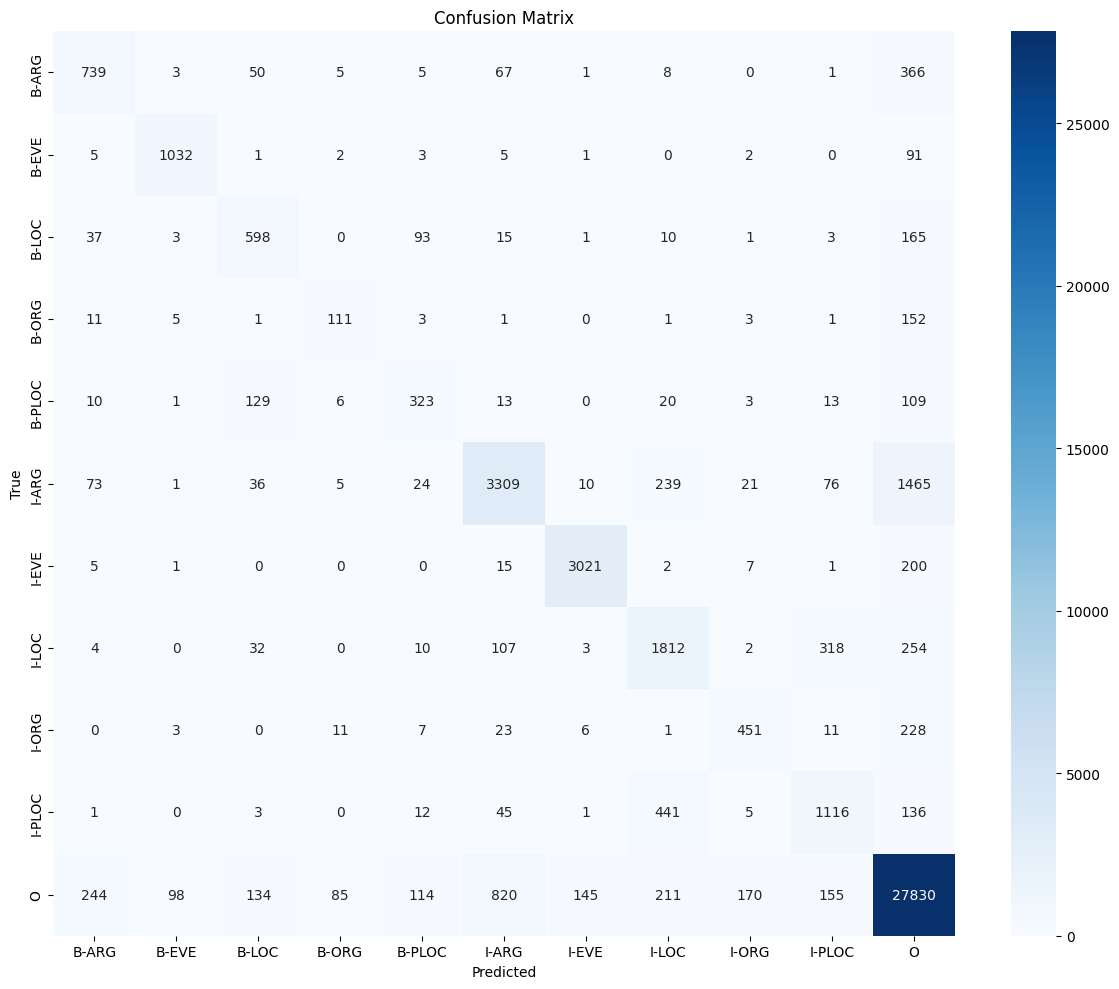

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
true_labels_flat = [label for sent in true_labels for label in sent]
true_predictions_flat = [pred for sent in true_predictions for pred in sent]

# Dapatkan label unik
unique_labels = sorted(list(set(true_labels_flat)))

# Buat confusion matrix
cm = confusion_matrix(true_labels_flat, true_predictions_flat, labels=unique_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_original_tokcls.png')  # Simpan gambar
plt.show()

In [67]:
true_predictions

[['O',
  'O',
  'O',
  'O',
  'B-EVE',
  'I-EVE',
  'I-EVE',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'I-PLOC',
  'I-PLOC',
  'I-PLOC',
  'O',
  'B-PLOC',
  'I-PLOC',
  'I-PLOC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-EVE',
  'I-EVE',
  'I-EVE',
  'O',
  'B-LOC',
  'I-LOC',
  'I-LOC',
  'B-LOC',
  'I-LOC',
  'O',
  'B-LOC',
  'I-LOC',
  'I-LOC',
  'O',
  'B-LOC',
  'I-PLOC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'B-EVE',
  'I-EVE',
  'I-EVE',
  'O',
  'O',
  'I-ORG',
  'I-ORG',
  'B-PLOC',
  'I-PLOC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O

In [73]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

args = TrainingArguments(
    output_dir="./org",
    save_strategy="epoch",
    save_total_limit=2,
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    greater_is_better=True,
    
    # Adjusted learning parameters
    learning_rate=1e-5,  # Lower learning rate
    weight_decay=0.2,    # Stronger weight decay
    
    # Add dropout at the optimizer level
    adam_epsilon=1e-8,
    adam_beta1=0.9,
    adam_beta2=0.999,
    
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=20,  # Reduce max epochs since overfitting happens early
    
    # Early stopping is crucial here
    seed=42
)

/home/riset/.local/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_11426/3629183360.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.430408,0.542394,0.657100,0.594262,0.852548


In [59]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.5048329830169678,
 'eval_precision': 0.66094511549057,
 'eval_recall': 0.7350930945086024,
 'eval_f1': 0.6960499888417764,
 'eval_accuracy': 0.8739739079448842,
 'eval_runtime': 9.9989,
 'eval_samples_per_second': 100.011,
 'eval_steps_per_second': 12.501,
 'epoch': 11.0}

In [74]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_10464/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.375859,0.583773,0.752644,0.657539,0.866938
2,0.434100,0.399394,0.622829,0.758308,0.683924,0.868518
3,0.434100,0.350557,0.718340,0.764728,0.740808,0.902376
4,0.220000,0.378121,0.704693,0.776813,0.738998,0.894250
5,0.115000,0.428866,0.703540,0.780589,0.740064,0.894080
6,0.115000,0.478584,0.713389,0.772659,0.741842,0.897692
7,0.063400,0.537993,0.715078,0.779079,0.745708,0.893573
8,0.028600,0.590657,0.714873,0.787764,0.749551,0.896563
9,0.028600,0.631646,0.719626,0.785121,0.750948,0.896789
10,0.011100,0.655335,0.723109,0.787009,0.753707,0.897466


TrainOutput(global_step=3150, training_loss=0.13879215683255877, metrics={'train_runtime': 605.4002, 'train_samples_per_second': 41.625, 'train_steps_per_second': 5.203, 'total_flos': 675351919080864.0, 'train_loss': 0.13879215683255877, 'epoch': 10.0})

In [97]:
from transformers import TrainingArguments, Trainer
batch_size = 8
args = TrainingArguments(
    output_dir="./result",
    save_strategy="no",  # Save model checkpoints every epoch
    eval_strategy="epoch",
    learning_rate=1e-4,
    weight_decay=0.05,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    seed=42
)

In [95]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_3742/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.600500,0.334450,0.642190,0.726586,0.681786,0.881045
2,0.415600,0.358657,0.632895,0.745468,0.684585,0.877998
3,0.332000,0.349016,0.681610,0.786631,0.730365,0.891823
4,0.267900,0.345837,0.731690,0.784743,0.757289,0.902714
5,0.180700,0.357152,0.686711,0.780589,0.730647,0.889622
6,0.145600,0.395005,0.731691,0.807402,0.767684,0.902714
7,0.125000,0.416909,0.739039,0.795695,0.766321,0.904012
8,0.112500,0.402108,0.729702,0.814577,0.769807,0.902714
9,0.078700,0.476361,0.744688,0.807402,0.774778,0.905762
10,0.063300,0.466341,0.740021,0.805136,0.771206,0.902094


TrainOutput(global_step=18360, training_loss=0.08319861918265783, metrics={'train_runtime': 653.706, 'train_samples_per_second': 224.459, 'train_steps_per_second': 28.086, 'total_flos': 3512947624134402.0, 'train_loss': 0.08319861918265783, 'epoch': 30.0})

In [96]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 1.3078254461288452,
 'eval_precision': 0.6555131372108691,
 'eval_recall': 0.6879566344567523,
 'eval_f1': 0.671343146274149,
 'eval_accuracy': 0.8616974494283202,
 'eval_runtime': 1.6557,
 'eval_samples_per_second': 603.979,
 'eval_steps_per_second': 75.497,
 'epoch': 30.0}

In [98]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_8784/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.553200,0.361256,0.590200,0.700529,0.640649,0.867107
2,0.351300,0.346301,0.653613,0.775302,0.709276,0.890582
3,0.267900,0.301565,0.718902,0.781344,0.748824,0.904125
4,0.208000,0.344740,0.739191,0.800604,0.768673,0.906044
5,0.155100,0.356639,0.728145,0.802115,0.763342,0.901868
6,0.113600,0.436154,0.732313,0.813066,0.770580,0.901473
7,0.057400,0.475941,0.757650,0.813444,0.784557,0.908583
8,0.036400,0.485010,0.748796,0.821752,0.783579,0.908414
9,0.027200,0.514435,0.762439,0.821752,0.790985,0.911687
10,0.016400,0.541623,0.765943,0.825529,0.794620,0.911687


TrainOutput(global_step=5760, training_loss=0.16267641745507716, metrics={'train_runtime': 739.4565, 'train_samples_per_second': 62.221, 'train_steps_per_second': 7.79, 'total_flos': 1137962900199186.0, 'train_loss': 0.16267641745507716, 'epoch': 10.0})

In [99]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.9426923394203186,
 'eval_precision': 0.6407766990291263,
 'eval_recall': 0.6844213999528636,
 'eval_f1': 0.661880341880342,
 'eval_accuracy': 0.857336558194078,
 'eval_runtime': 7.0466,
 'eval_samples_per_second': 141.912,
 'eval_steps_per_second': 17.739,
 'epoch': 10.0}

In [ ]:
# 1. Dapatkan prediksi mentah dari trainer
predictions, labels, metrics = trainer.predict(tokenized_datasets['test'])

# 2. Konversi prediksi menjadi label (ambil argmax untuk setiap token)
predictions = np.argmax(predictions, axis=2)

# 3. Konversi ID label kembali ke string label
label_list = tokenized_datasets['val'].features['labels'].feature.names  # Dapatkan daftar label
true_labels = []
pred_labels = []

# 4. Loop melalui setiap contoh
for prediction, label in zip(predictions, labels):
    true_example = []
    pred_example = []
    
    # Loop melalui setiap token dalam contoh
    # Perhatikan bahwa kita hanya memproses token yang valid (bukan padding)
    for pred_id, true_id in zip(prediction, label):
        # Abaikan token padding/special (biasanya -100)
        if true_id != -100:  
            true_example.append(label_list[true_id])
            pred_example.append(label_list[pred_id])
    
    true_labels.append(true_example)
    pred_labels.append(pred_example)

# Sekarang Anda memiliki true_labels dan pred_labels dalam format yang dapat digunakan

In [ ]:
# Laporan klasifikasi lengkap
print(classification_report(true_labels, pred_labels))

# Confusion matrix untuk entity level, bukan token level
cm = confusion_matrix(true_labels, pred_labels)

In [55]:
from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./result",
    save_strategy="no",  # Save model checkpoints every epoch
    eval_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=30,
    seed=42
)

In [56]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_5174/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.333577,0.627737,0.714502,0.668315,0.882287
2,0.449100,0.336463,0.636424,0.728474,0.679345,0.888437
3,0.449100,0.342969,0.658228,0.746224,0.699469,0.892388
4,0.221700,0.388620,0.680635,0.760574,0.718388,0.890977
5,0.127900,0.398281,0.687806,0.794562,0.737340,0.892557
6,0.127900,0.404042,0.701387,0.783233,0.740054,0.898313
7,0.085700,0.486615,0.710930,0.788520,0.747717,0.897861
8,0.057100,0.468857,0.706360,0.788520,0.745182,0.894137
9,0.057100,0.555455,0.685125,0.789653,0.733684,0.891259
10,0.042800,0.505097,0.708347,0.804381,0.753316,0.897748


TrainOutput(global_step=9510, training_loss=0.05874523774580687, metrics={'train_runtime': 1535.9816, 'train_samples_per_second': 98.907, 'train_steps_per_second': 6.191, 'total_flos': 4109593312267680.0, 'train_loss': 0.05874523774580687, 'epoch': 30.0})

In [57]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 1.3271681070327759,
 'eval_precision': 0.5946001648804616,
 'eval_recall': 0.6799434362479377,
 'eval_f1': 0.6344145134689388,
 'eval_accuracy': 0.8541116974494283,
 'eval_runtime': 3.1529,
 'eval_samples_per_second': 317.166,
 'eval_steps_per_second': 19.981,
 'epoch': 30.0}

### KEE_2

In [68]:
from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./result",
    save_strategy="no",  # Save model checkpoints every epoch
    eval_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=30,
    seed=42
)

In [69]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_3736/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.372954,0.568188,0.737915,0.642024,0.862310
2,0.469400,0.356863,0.582635,0.734894,0.649967,0.875515
3,0.469400,0.376760,0.601356,0.737160,0.662369,0.877264
4,0.237100,0.348399,0.650492,0.774547,0.707119,0.893290
5,0.138100,0.371568,0.673469,0.772659,0.719662,0.893911
6,0.138100,0.436569,0.681669,0.783610,0.729093,0.896281
7,0.084800,0.443811,0.713083,0.767749,0.739407,0.903730
8,0.062600,0.451191,0.727015,0.773414,0.749497,0.902827
9,0.062600,0.532535,0.668806,0.787009,0.723109,0.891936
10,0.041800,0.563412,0.691967,0.767749,0.727891,0.896394


TrainOutput(global_step=9390, training_loss=0.06210532199841338, metrics={'train_runtime': 927.0386, 'train_samples_per_second': 161.806, 'train_steps_per_second': 10.129, 'total_flos': 4037155141045968.0, 'train_loss': 0.06210532199841338, 'epoch': 30.0})

In [70]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.7464186549186707,
 'eval_precision': 0.7357779300891021,
 'eval_recall': 0.8108006042296072,
 'eval_f1': 0.7714696370822852,
 'eval_accuracy': 0.9101066531234129,
 'eval_runtime': 1.6673,
 'eval_samples_per_second': 377.851,
 'eval_steps_per_second': 23.991,
 'epoch': 30.0}

In [47]:
from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./e2t",
    save_strategy="epoch",  
    eval_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",  
    greater_is_better=True,
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=30,
)

In [48]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_8531/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.370886,0.573655,0.736782,0.645065,0.865696
2,0.495100,0.379914,0.630092,0.724320,0.673928,0.884149
3,0.495100,0.399121,0.584229,0.738671,0.652435,0.875684
4,0.250300,0.412970,0.602157,0.759063,0.671567,0.880989
5,0.144100,0.366864,0.714386,0.766994,0.739756,0.901868
6,0.144100,0.421811,0.691043,0.777946,0.731924,0.898200
7,0.088400,0.476596,0.681454,0.771526,0.723698,0.895548
8,0.066000,0.436857,0.719959,0.794184,0.755252,0.904351
9,0.066000,0.547881,0.678454,0.782477,0.726763,0.891541
10,0.045300,0.507848,0.697248,0.774924,0.734037,0.898369


TrainOutput(global_step=9390, training_loss=0.06574996078230194, metrics={'train_runtime': 963.0996, 'train_samples_per_second': 155.747, 'train_steps_per_second': 9.75, 'total_flos': 4037155141045968.0, 'train_loss': 0.06574996078230194, 'epoch': 30.0})

In [49]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.6383793950080872,
 'eval_precision': 0.7495559502664298,
 'eval_recall': 0.7968277945619335,
 'eval_f1': 0.7724693391909206,
 'eval_accuracy': 0.9066644094577055,
 'eval_runtime': 1.6538,
 'eval_samples_per_second': 380.946,
 'eval_steps_per_second': 24.187,
 'epoch': 30.0}

In [54]:
from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./result",
    save_strategy="no",  # Save model checkpoints every epoch
    eval_strategy="epoch",
    weight_decay=0.05,
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=50,
    seed=42
)

In [ ]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_5711/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.347478,0.606734,0.700906,0.650429,0.873088
2,0.498900,0.337581,0.614534,0.734517,0.669190,0.881158
3,0.498900,0.386098,0.614431,0.729985,0.667242,0.876531
4,0.263600,0.356544,0.636710,0.757175,0.691737,0.888437
5,0.158800,0.417942,0.644741,0.766239,0.700259,0.887647
6,0.158800,0.442156,0.645254,0.762462,0.698979,0.889058
7,0.104500,0.402818,0.689157,0.775302,0.729696,0.902037
8,0.076100,0.461557,0.672822,0.784366,0.724324,0.893065
9,0.076100,0.526563,0.669686,0.781722,0.721380,0.892049
10,0.051200,0.511178,0.688830,0.782477,0.732673,0.891146


In [57]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.7793683409690857,
 'eval_precision': 0.7393708952644313,
 'eval_recall': 0.8077794561933535,
 'eval_f1': 0.7720628045479154,
 'eval_accuracy': 0.9115174087241127,
 'eval_runtime': 1.8638,
 'eval_samples_per_second': 338.02,
 'eval_steps_per_second': 21.462,
 'epoch': 50.0}

### Combine

In [52]:
from transformers import TrainingArguments, Trainer
batch_size = 16
args = TrainingArguments(
    output_dir="./combine",
    save_strategy="epoch",  
    eval_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",  
    greater_is_better=True,
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=30,
)

In [53]:
#Proses Training
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'],
    data_collator = data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.model.past_key_values = None
trainer.train()

/tmp/ipykernel_4099/2747896693.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.442500,0.409049,0.541116,0.757931,0.631430,0.850516
2,0.183500,0.326390,0.632202,0.745846,0.684338,0.885898
3,0.133700,0.410643,0.613167,0.763218,0.680013,0.876756
4,0.093100,0.349848,0.678150,0.780589,0.725772,0.898708
5,0.077300,0.363710,0.679563,0.776057,0.724612,0.902940
6,0.058300,0.378889,0.683569,0.783988,0.730343,0.899159
7,0.052700,0.414518,0.702457,0.788142,0.742837,0.904351
8,0.039600,0.509784,0.645899,0.779079,0.706265,0.889002
9,0.035200,0.487336,0.677922,0.788520,0.729050,0.899836
10,0.029800,0.516469,0.691717,0.782100,0.734137,0.900231


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [54]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.7058956027030945,
 'eval_precision': 0.7396265560165975,
 'eval_recall': 0.8077794561933535,
 'eval_f1': 0.7722021660649819,
 'eval_accuracy': 0.909373060211049,
 'eval_runtime': 2.1996,
 'eval_samples_per_second': 286.416,
 'eval_steps_per_second': 18.185,
 'epoch': 30.0}